# Basic Python Workshop - Plotting

In this workshop we will cover some basic plotting methods. Python has many different packages that can be used for plotting. These different packages have different levels of control and flexibility. In this session we will briefly cover the two most commonly used packages and provide you with the tools and resources to dive deeper into both of these packages.

The two main strategies for plotting in python are based on Low Level vs High Level plotting. You can get more complicated and mix these methods, but that is a much more advanced tutorial.

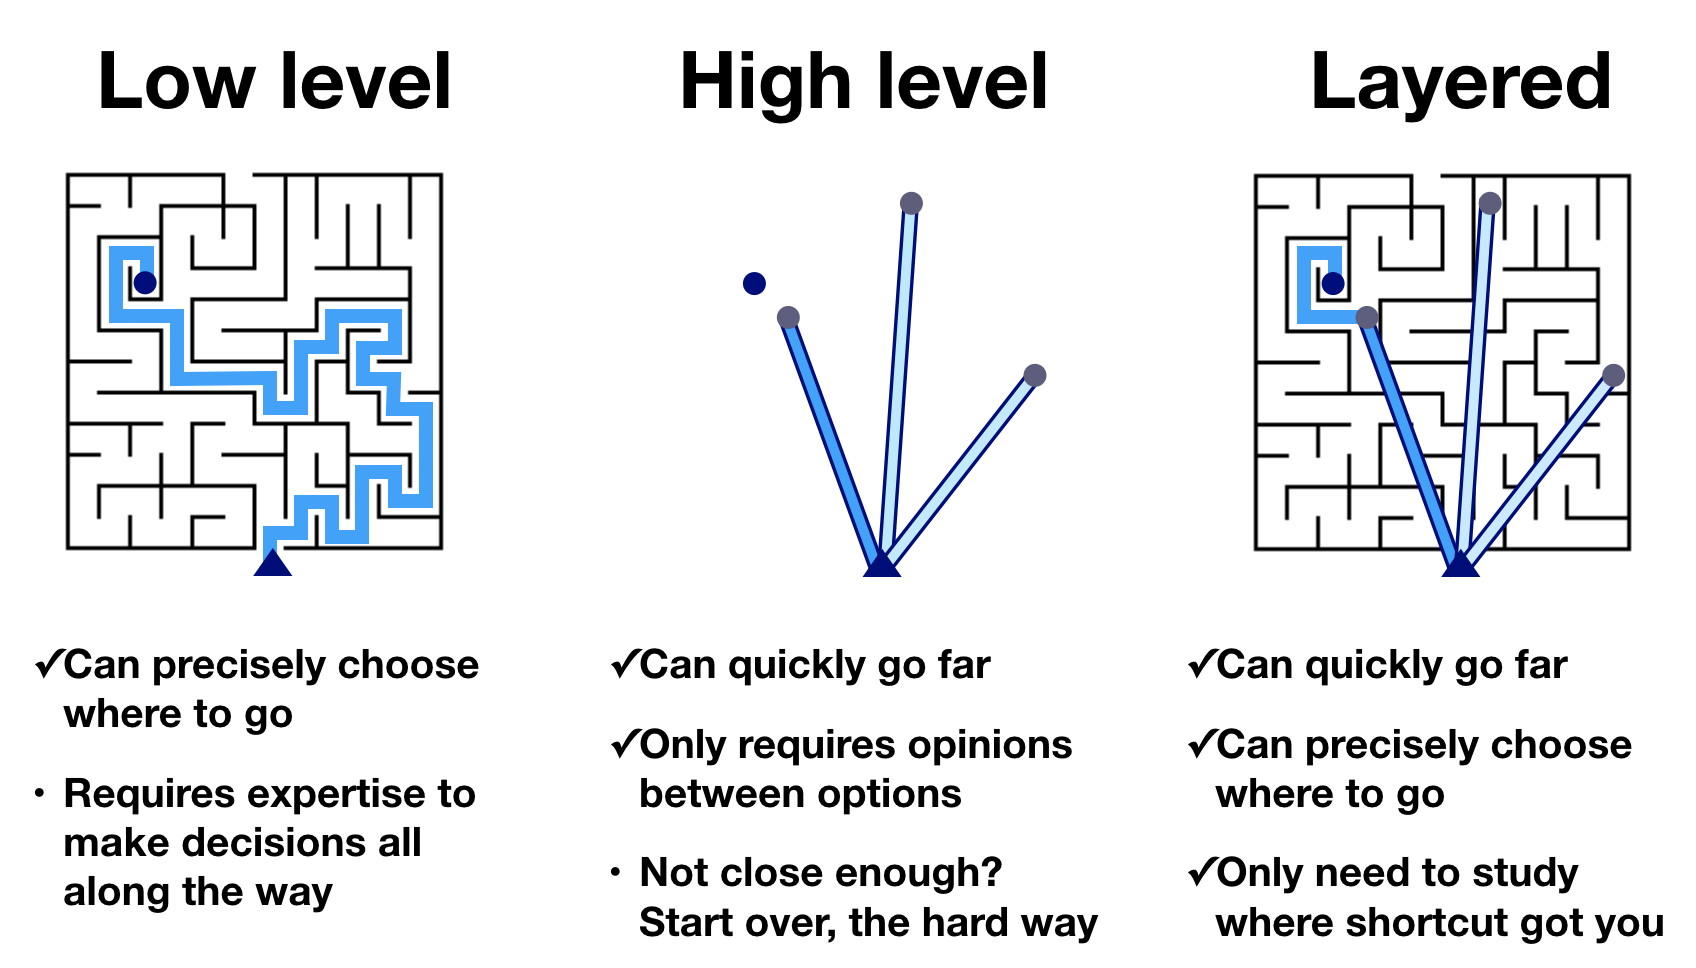
*Source: https://holoviz.org/background.html

Today we will discuss two packages
1. `plotnine` - High Level Plotting - very similar to ggplot in R
2. `matplotlib.pyplot` - Low Level Plotting - very similar to plotting in Matlab

You can choose to use whichever plotting tool you are most comfortable with. Though the majority of people currently use `plotnine` or other High Level plotting tools as these get results faster.

# Import packages
Import 3 packages:
1. `pandas` as `pd`
2. `matplotlib.pyplot` as `plt`
3. `plotnine` as `plt`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotnine as p9

# Importing Data
Before we can start plotting we need to load the data we're going to plot. For the purposes of this example we're going to load a table of simulation results that are formatted the way that our ABM simulator would generate.

To load a csv file use `pd.read_csv('path/to/file')`. Here we have saved two files at `../Tables/tall_sim.csv` and `../Tables/wide_sim.csv`. These two data tables hold the same exact information, but in slightly different formats. You will see that `plotnine` works better with a "tall" table while `matplotlib` works better with a "wide" table.

## First Task
* Load both data tables. Name the tall one "df_tall" and the wide one "df_wide"
* Use `display(df)` to display both data tables
    * Hint if you want to show just the first few lines of a dataframe, you can use `display(df.head())`
 
Note the differences between a tall and wide table. A tall table has a column called `output` where the output variable is listed, a column called `value` where the value of that variable is listed, and a column called `output_unit` where the unit of that variable is listed.

A wide table has a column named after every output variable in the model and the entries are the values of those output variables at the appropriate time and conditions.

In the example we are using, we only have a single output variable ('cytokine_central_nM' - the concentration of cytokine in the central compartment) and we are scanning over two separate binding strengths (strong and week) and two separate receptor burdens (high and low). For each of those conditions we look at 19 different doses and output the simulation at a single time point

In [2]:
df_tall = pd.read_csv('../Tables/tall_sim.csv')
df_wide = pd.read_csv('../Tables/wide_sim.csv')

display(df_tall.head())
display(df_wide.head())

,Unnamed: 0,dose_mpk,binding_strength,burden,scan_0_type,id,param_scan_0,scan_0_value,scan_0_fold,t,output,value,output_unit
0,0,0.00001,strong,low,value,0,kd_mab,0.1,1.0,172800.0,cytokine_central_nM,8.854676e-11,nmol/L
1,1,0.00001,strong,low,value,1,kd_mab,0.3,3.0,172800.0,cytokine_central_nM,2.426025e-12,nmol/L
2,2,0.00001,strong,low,value,2,kd_mab,1.0,10.0,172800.0,cytokine_central_nM,5.191411e-15,nmol/L
3,3,0.00001,strong,low,value,3,kd_mab,3.0,30.0,172800.0,cytokine_central_nM,1.047507e-16,nmol/L
4,4,0.00001,strong,low,value,4,kd_mab,10.0,100.0,172800.0,cytokine_central_nM,1.000014e-16,nmol/L


,Unnamed: 0,dose_mpk,binding_strength,burden,scan_0_type,id,param_scan_0,scan_0_value,scan_0_fold,t,cytokine_central_nM
0,0,0.00001,strong,low,value,0,kd_mab,0.1,1.0,172800.0,8.854676e-11
1,1,0.00001,strong,low,value,1,kd_mab,0.3,3.0,172800.0,2.426025e-12
2,2,0.00001,strong,low,value,2,kd_mab,1.0,10.0,172800.0,5.191411e-15
3,3,0.00001,strong,low,value,3,kd_mab,3.0,30.0,172800.0,1.047507e-16
4,4,0.00001,strong,low,value,4,kd_mab,10.0,100.0,172800.0,1.000014e-16


# Plotting
You may choose either package to plot in. 


## Plotting Task
* Using `plotnine`, attempt to recreate the following plot.
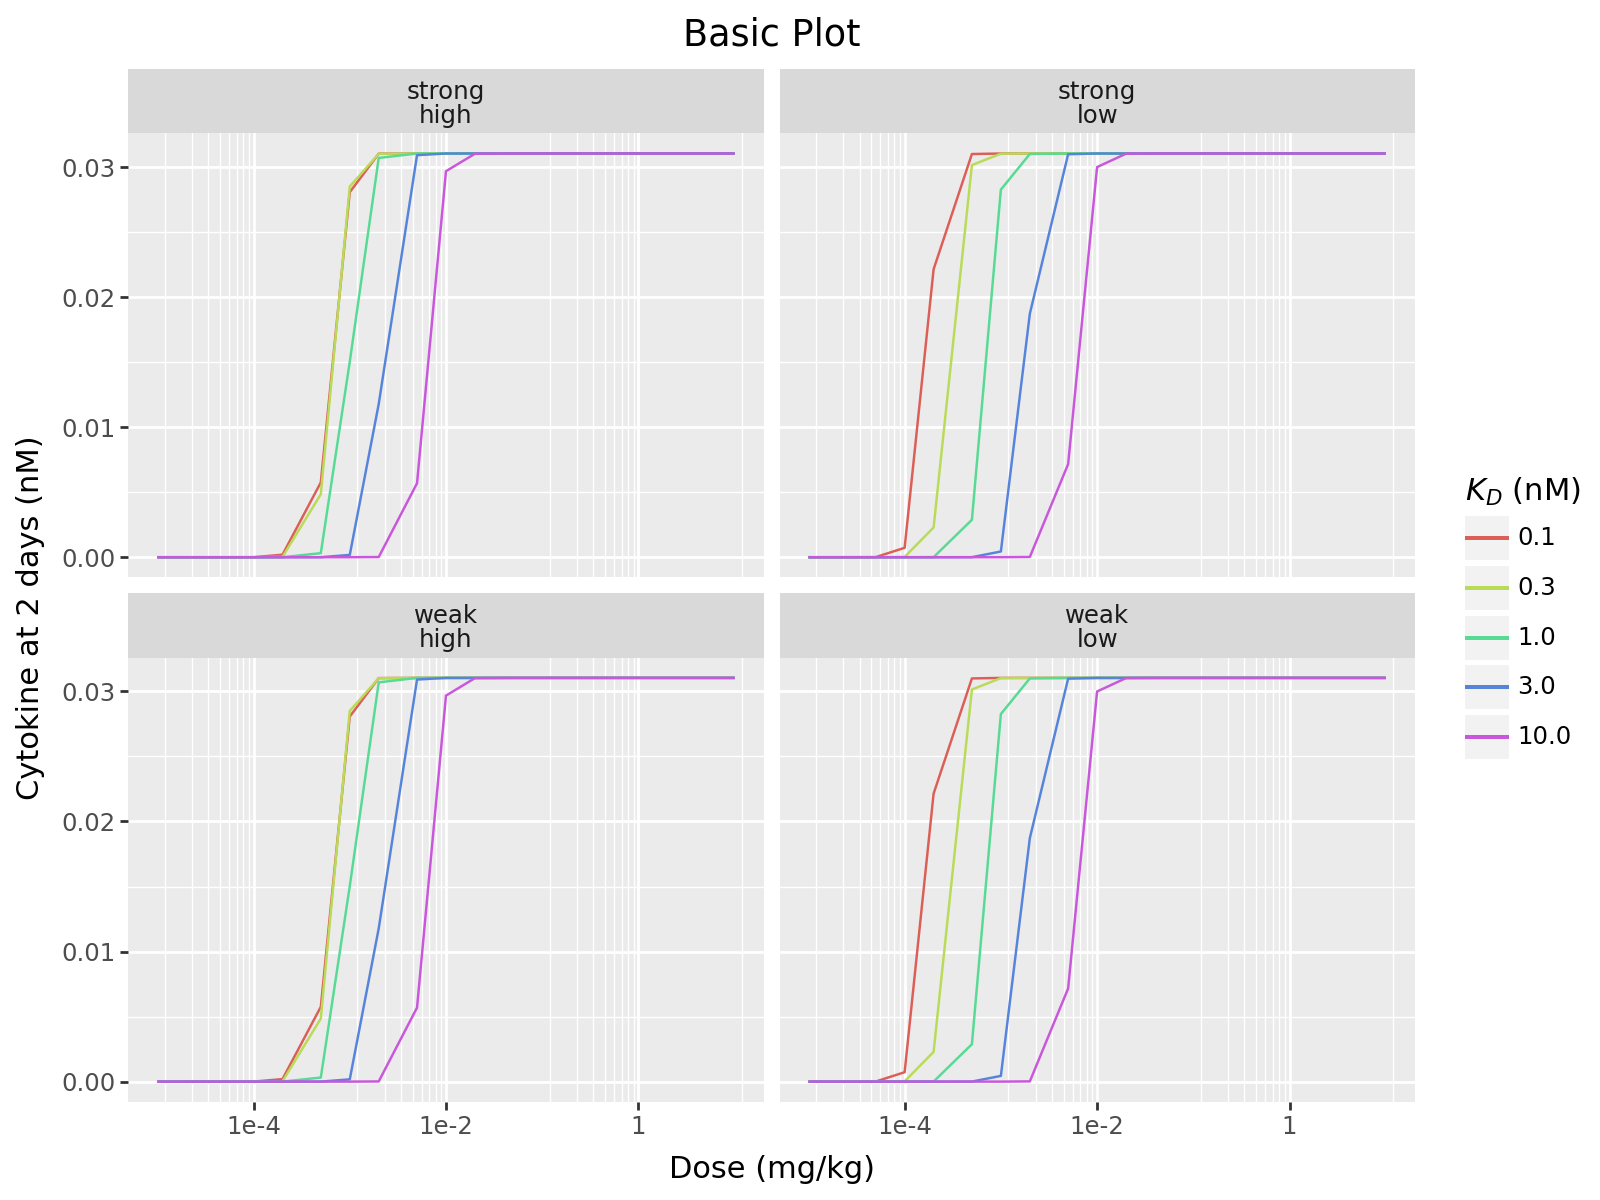


* Using `matplotlib`, attempt to create the following plot
  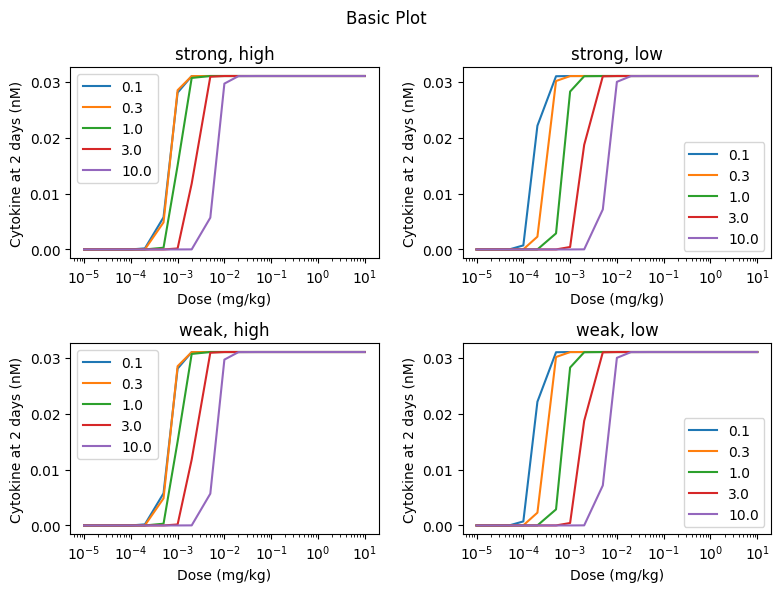

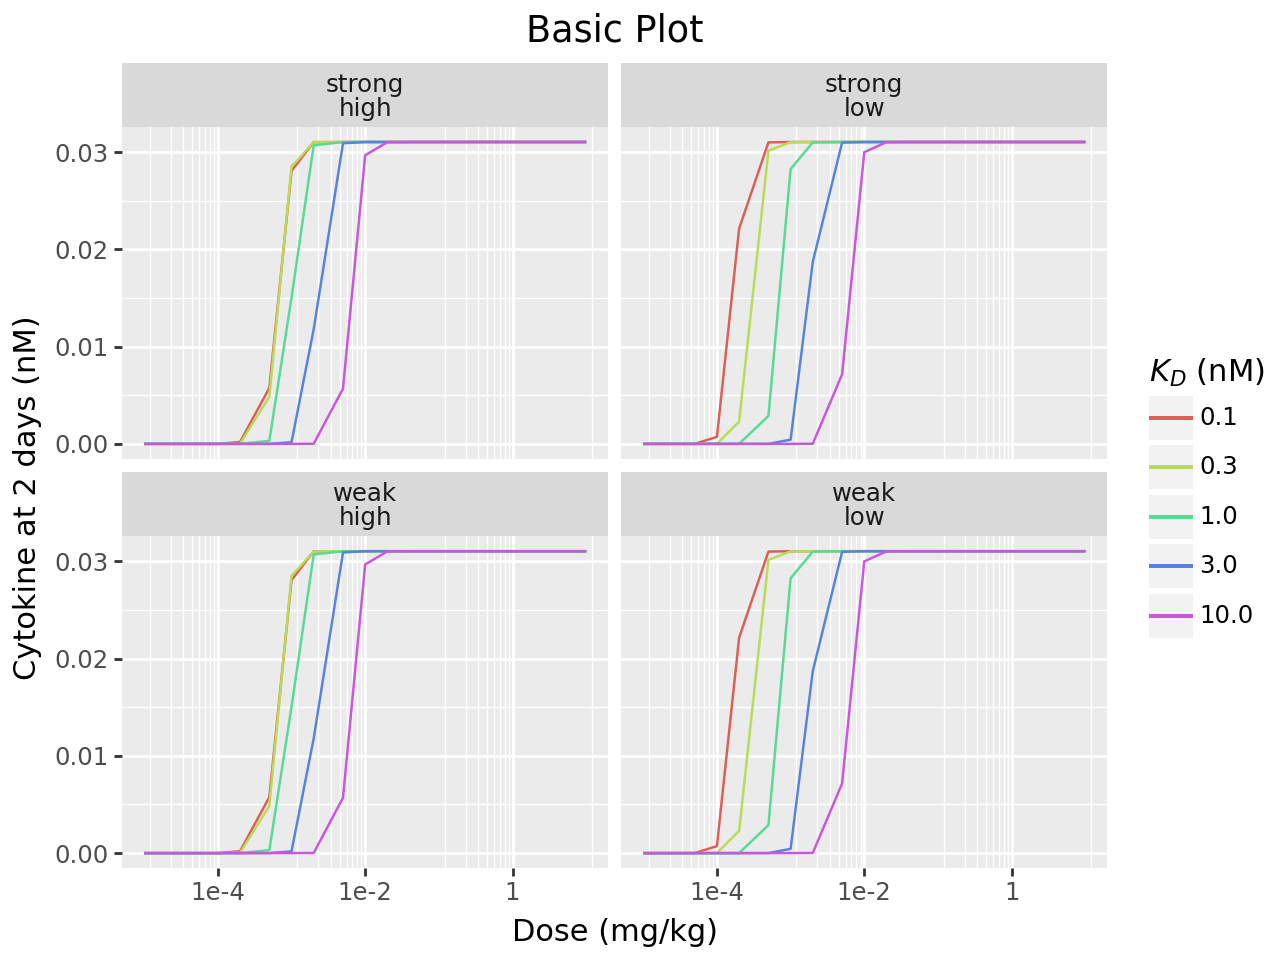

In [3]:
#Plotnine

fig = (p9.ggplot()
       + p9.geom_line(df_tall, p9.aes('dose_mpk', 'value', color='factor(scan_0_value)'))
       + p9.facet_wrap(['binding_strength','burden'])
       + p9.scale_x_log10()
       + p9.labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (nM)')
       + p9.theme()
       + p9.ggtitle('Basic Plot')
)

fig.show()

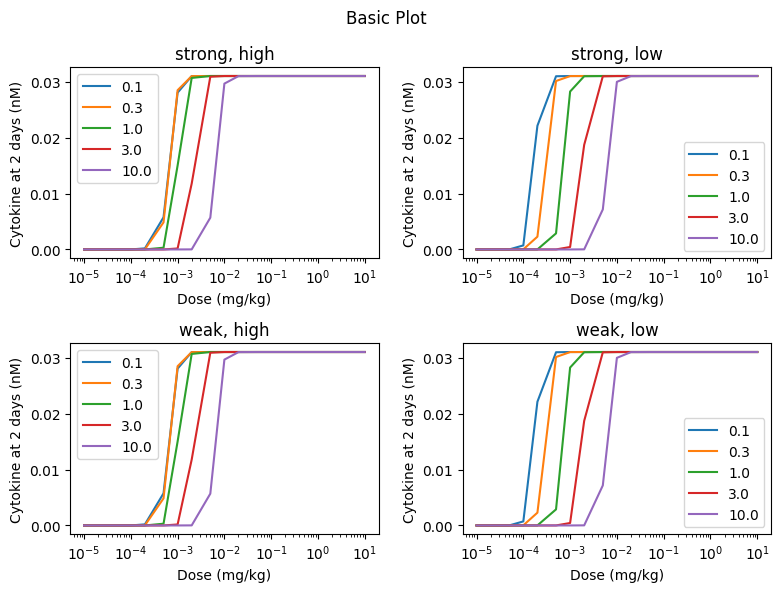

In [4]:
#Matplotlib

fig = plt.figure(figsize = (8,6))

fig.add_subplot(221)
data = df_wide.query(f'binding_strength == "strong" and burden == "high"')
for kd in data.scan_0_value.unique():
    plt.plot(data.query(f'scan_0_value == {kd}').dose_mpk,
             data.query(f'scan_0_value == {kd}').cytokine_central_nM,
             label = kd)
plt.legend()
plt.xscale('log')
plt.title('strong, high')
plt.xlabel('Dose (mg/kg)')
plt.ylabel('Cytokine at 2 days (nM)')

fig.add_subplot(222)
data = df_wide.query(f'binding_strength == "strong" and burden == "low"')
for kd in data.scan_0_value.unique():
    plt.plot(data.query(f'scan_0_value == {kd}').dose_mpk,
             data.query(f'scan_0_value == {kd}').cytokine_central_nM,
             label = kd)
plt.legend()
plt.xscale('log')
plt.title('strong, low')
plt.xlabel('Dose (mg/kg)')
plt.ylabel('Cytokine at 2 days (nM)')


fig.add_subplot(223)
data = df_wide.query(f'binding_strength == "weak" and burden == "high"')
for kd in data.scan_0_value.unique():
    plt.plot(data.query(f'scan_0_value == {kd}').dose_mpk,
             data.query(f'scan_0_value == {kd}').cytokine_central_nM,
             label = kd)
plt.legend()
plt.xscale('log')
plt.title('weak, high')
plt.xlabel('Dose (mg/kg)')
plt.ylabel('Cytokine at 2 days (nM)')


fig.add_subplot(224)
data = df_wide.query(f'binding_strength == "weak" and burden == "low"')
for kd in data.scan_0_value.unique():
    plt.plot(data.query(f'scan_0_value == {kd}').dose_mpk,
             data.query(f'scan_0_value == {kd}').cytokine_central_nM,
             label = kd)
plt.legend()
plt.xscale('log')
plt.title('weak, low')
plt.xlabel('Dose (mg/kg)')
plt.ylabel('Cytokine at 2 days (nM)')


plt.suptitle('Basic Plot')

plt.tight_layout()

display(fig)

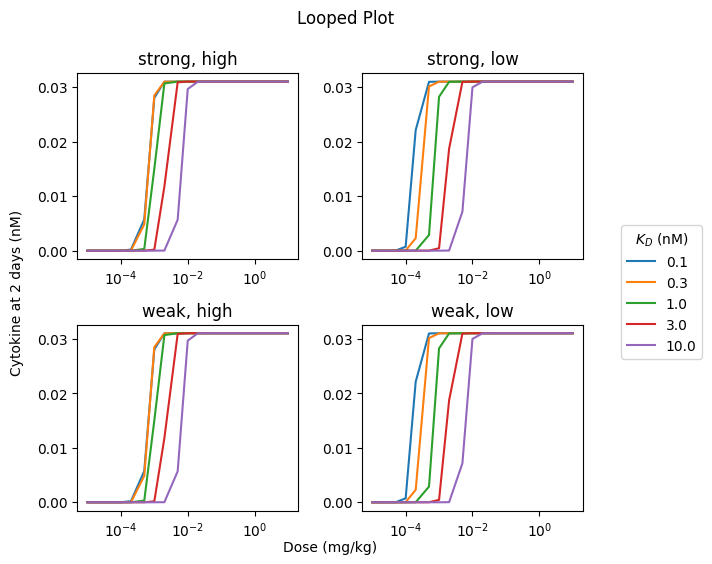

In [5]:
#matplotlib - cleaner version

fig, axs = plt.subplots(2, 2, figsize = (8,6))

sets = [[['strong','high'],['strong','low']],[['weak','high'],['weak','low']]]
for row in range(2):
    for col in range(2):
        handles = []
        data = df_wide.query(f'binding_strength == "{sets[row][col][0]}" and burden == "{sets[row][col][1]}"')
        for kd in data.scan_0_value.unique():
            handle, = axs[row,col].plot(data.query(f'scan_0_value =={kd}').dose_mpk,
                                       data.query(f'scan_0_value =={kd}').cytokine_central_nM,
                                       label = f'{kd}')
            handles.append(handle)
        axs[row,col].set_xscale('log')
        axs[row,col].set_title(', '.join(sets[row][col]))
fig.add_subplot(111, frameon = False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel('Cytokine at 2 days (nM)\n')
plt.xlabel('Dose (mg/kg)')
plt.legend(handles = handles, loc = 'center right', bbox_to_anchor=(1.25, 0.5), title = '$K_D$ (nM)')
plt.suptitle('Looped Plot')
plt.tight_layout()

display(fig)